In [1]:
!pip install chart_studio

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from scipy import stats

from datetime import date
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.cm as cm
##SKlearn
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

sns.set()
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

#for interactive map

import chart_studio.plotly as py
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

###warnings

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
from timeit import default_timer as timer


In [6]:
#open fiile 

donors = pd.read_csv(r'C:\Users\Ricardo Santos\Desktop\Mestrado Ricardo\Ano 1\Fall Semester\Data Mining\Aulas\Práticas\Git Pull\DMDSAA\group_work\donors.csv')


Pop_census2010=pd.read_csv(r'C:\Users\Ricardo Santos\Documents\MSC DM\DM\Proj-DM\Data\POP_census_2010.csv', sep=';')

C:\Users\Ricardo Santos\anaconda3\envs\Data_Mining\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.



### First Part: Cleaning

In [7]:
### replace blank spaces for Nan values

donors.replace(" ", np.nan, inplace=True)

In [8]:
### Put ControlN var in index

donors=donors.set_index('CONTROLN', drop = True).sort_index(axis = 0)

In [9]:
###converts type of DOB instances to datetime
donors['DOB'] = pd.to_datetime(donors['DOB'])

###calculates age of donors using their date of birthd and current date (XX-12-2020)
donors['AGE'] = (date.today().year - donors['DOB'].dt.year) - ((date.today().month - donors['DOB'].dt.month) < 0)

###drops variable DOB as this will no longer neede since we have the age of the donors
donors.drop(['DOB'], axis = 1, inplace = True)

In [10]:
####ONLY METRICS

pd.set_option('display.max_columns', None)
df_metrics=donors.select_dtypes(np.number,exclude='bool')
df_metrics

,Unnamed: 0,TCODE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,AGE
CONTROLN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,52895,1,NaN,4.0,9.0,19,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,9.0,545,165,213,99,0,0,51,49,94,1,0,4,8,0,0,1,2,0,1,0,5,0,0,3,37,43,44,39,48,49,21,46,34,20,5,24,24,14,12,14,8,17,25,31,18,9,31,9,27,17,41,42,21,6,3,64,10,8,18,180,254,99,99,0,0,0,0,0,0,0,791,793,6,5,87,13,95,5,0,31,77,64,27,88,12,5,1,4,12,19,5,18,53,24,0,1,0,0,0,9,58,98,0,0,88,61,65,14,4,0,0,0,13,0,0,0,69,77,85,85,3360.0,201.0,618.0,630,658,600,643,21409,9,7,10,11,29,29,3,3,0,5,3,13,14,23,35,4,3,0,32,0,63,3,40,60,7,72,15,0,0,0,0,0,6,6,6,0,23,26,0,92,64,68,61,68,59,56,67,99,0,0,29,25,2,11,18,1,0,0,0,10,4,0,0,0,5,8,8,0,6,3,6,13,10,1,0,11,13,16,0,0,8,0,7,62,24,0,160,3,6,18,16,5,38,13,12,14,0,14,11,0,0,0,18,37,3,32,14,45,12,1,9,0,12,0,0,1,3,2,0,0,0,4,0,0,10,50,84,5,11,0,96,85,10,12,35,0,0,0,0,13,87,0,0,90,0,10,0,0,0,99,0,99,99,97,7,3,5,6,23,60,5,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,273.00,12,6,10.0,30.0,30.0,3.0,22.750000,0,3,85.0
2,75718,0,NaN,7.0,6.0,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6.0,1335,372,424,99,0,0,51,49,92,1,0,3,10,0,1,0,0,0,1,0,6,0,0,3,31,37,40,32,41,44,26,35,43,22,13,28,24,15,12,5,3,15,13,36,22,14,13,2,10,7,31,63,39,13,4,63,8,3,26,253,314,99,99,0,0,0,0,0,0,0,2288,2311,12,11,82,18,99,1,0,46,88,74,39,89,11,6,1,5,10,9,5,19,62,10,1,1,0,87,94,99,99,99,3,0,79,58,61,17,5,0,0,0,17,0,0,0,97,97,99,99,8735.0,13.0,803.0,468,475,498,512,15932,1,6,22,26,35,8,2,0,0,1,3,25,23,39,8,2,0,0,15,7,46,3,54,46,9,89,6,0,0,0,0,0,2,2,0,36,22,34,22,47,73,82,62,78,59,68,40,91,99,3,18,9,3,11,20,0,4,7,2,1

In [11]:
### Number of Null Values in each feature

pd.DataFrame(df_metrics.isnull().sum().sort_values(ascending=False)).head(30)

,0
RAMNT_5,95403
RAMNT_3,95170
RAMNT_4,95131
RAMNT_6,94636
RAMNT_15,88150
RAMNT_23,87553
RAMNT_20,87524
RAMNT_7,86517
RAMNT_17,86011
RAMNT_21,85899


In [12]:
###DROP features

# drop non sense metrics
## "Unnamed: 0","TCODE", "RFA_2R","RFA_2F ","RFA_2A  ","HPHONE_D","RAMNT_5",

# drop  metrics with huge number of null values
## > 50.000 Nan Values


df_metrics.drop(columns=["TCODE","Unnamed: 0","RFA_2F","HPHONE_D","RAMNT_5",
 "RAMNT_3","RAMNT_4","RAMNT_6","RAMNT_15","RAMNT_23","RAMNT_20","RAMNT_7","RAMNT_17","RAMNT_21","RAMNT_10",
 "RAMNT_13","NUMCHLD","RAMNT_11","RAMNT_19","RAMNT_9","RAMNT_24","RAMNT_18","RAMNT_22","RAMNT_8","RAMNT_14",
 "RAMNT_12","RAMNT_16","MBCOLECT","MAGFAML","MAGFEM","MAGMALE","PUBGARDN","PUBHLTH","PUBDOITY","MBBOOKS"
,"MBGARDEN","MBCRAFT","PUBNEWFN","PUBPHOTO","PUBOPP","PUBCULIN"], inplace=True)

C:\Users\Ricardo Santos\anaconda3\envs\Data_Mining\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_metrics

,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE
CONTROLN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,9.0,19,0,0,0,0,0,0,0,9.0,545,165,213,99,0,0,51,49,94,1,0,4,8,0,0,1,2,0,1,0,5,0,0,3,37,43,44,39,48,49,21,46,34,20,5,24,24,14,12,14,8,17,25,31,18,9,31,9,27,17,41,42,21,6,3,64,10,8,18,180,254,99,99,0,0,0,0,0,0,0,791,793,6,5,87,13,95,5,0,31,77,64,27,88,12,5,1,4,12,19,5,18,53,24,0,1,0,0,0,9,58,98,0,0,88,61,65,14,4,0,0,0,13,0,0,0,69,77,85,85,3360.0,201.0,618.0,630,658,600,643,21409,9,7,10,11,29,29,3,3,0,5,3,13,14,23,35,4,3,0,32,0,63,3,40,60,7,72,15,0,0,0,0,0,6,6,6,0,23,26,0,92,64,68,61,68,59,56,67,99,0,0,29,25,2,11,18,1,0,0,0,10,4,0,0,0,5,8,8,0,6,3,6,13,10,1,0,11,13,16,0,0,8,0,7,62,24,0,160,3,6,18,16,5,38,13,12,14,0,14,11,0,0,0,18,37,3,32,14,45,12,1,9,0,12,0,0,1,3,2,0,0,0,4,0,0,10,50,84,5,11,0,96,85,10,12,35,0,0,0,0,13,87,0,0,90,0,10,0,0,0,99,0,99,99,97,7,3,5,6,23,60,5,12,273.00,12,6,10.0,30.0,30.0,3.0,22.750000,85.0
2,7.0,6.0,2,0,0,0,0,0,0,0,6.0,1335,372,424,99,0,0,51,49,92,1,0,3,10,0,1,0,0,0,1,0,6,0,0,3,31,37,40,32,41,44,26,35,43,22,13,28,24,15,12,5,3,15,13,36,22,14,13,2,10,7,31,63,39,13,4,63,8,3,26,253,314,99,99,0,0,0,0,0,0,0,2288,2311,12,11,82,18,99,1,0,46,88,74,39,89,11,6,1,5,10,9,5,19,62,10,1,1,0,87,94,99,99,99,3,0,79,58,61,17,5,0,0,0,17,0,0,0,97,97,99,99,8735.0,13.0,803.0,468,475,498,512,15932,1,6,22,26,35,8,2,0,0,1,3,25,23,39,8,2,0,0,15,7,46,3,54,46,9,89,6,0,0,0,0,0,2,2,0,36,22,34,22,47,73,82,62,78,59,68,40,91,99,3,18,9,3,11,20,0,4,7,2,18,2,4,2,3,0,9,21,5,2,7,11,8,9,2,0,9,5,4,4,2,1,5,10,76,7,0,123,4,11,33,32,6,9,5,4,25,1,19,8,0,0,0,15,28,0,36,37,18,6,0,12,1,3,1,1,3,3,0,3,0,0,1,0,0,12,47,85,7,4,4,99,86,46,7,24,0,0,2,28,92,8,0,0,97,0,1,0,0,1,99,0,99,99,98,12,2,6,10,36,99,9,27,157.00,16,3,5.0,15.0,10.0,4.0,9.812500,74.0
4,5.0,9.0,12,0,0,0,0,0,0,0,8.0,1731,414,558,0,99,0,48,52,95,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,36,44,47,40,50,53,24,42,40,18,8,20,22,11,8,10,20,15,17,36,20,12,23,13,20,24,31,44,29,9,1,60,7,19,14,182,260,72,71,0,25,25,24,16,16,0,844,937,3,4,72,28,88,12,1,41,74,67,36,74,26,5,1,4,9,19,1,20,51,24,1,2,1,3,7,28,63,92,0,4,57,64,58,14,4,5,20,3,8,1

In [14]:
### remove dummies features

for col in df_metrics.columns:
    if len(df_metrics[col].unique()) <=2:
        df_metrics.drop(col,inplace=True,axis=1)

In [15]:
#Fill median missing variables with median

df_metrics=df_metrics.apply(lambda x: x.fillna(x.median()),axis=0)

In [16]:

# Get column names first
names = df_metrics.columns

# Create the Scaler object

scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object

scaled_df = scaler.fit_transform(df_metrics)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
df_metrics = pd.DataFrame(normalized_df,columns=names) 

In [17]:
###check if some feature have NaN Values

df_metrics.isnull().sum().sort_values(ascending=False)

AGE       0
ETHC4     0
HHD9      0
HHD10     0
HHD11     0
         ..
EIC6      0
EIC7      0
EIC8      0
EIC9      0
INCOME    0
Length: 310, dtype: int64

### Feature Understanding  

- df_personal
- df_behavior
- df_census

In [18]:
### df_personal


df_personal= df_metrics[["AGE","HIT","INCOME"]]

In [19]:
df_personal

,AGE,HIT,INCOME
0,0.096845,0.102123,0.003275
1,0.053065,-0.008961,0.119168
2,-0.092761,0.063566,0.045359
3,0.164326,-0.030205,-0.098915
4,0.000614,-0.001396,-0.071940
...,...,...,...
95407,0.000539,0.901380,0.023585
95408,0.078885,-0.021289,0.076164
95409,0.001088,-0.025556,0.047649
95410,0.088107,0.052805,0.064831


In [20]:
### corr check!

df_personal.corr()

,AGE,HIT,INCOME
AGE,1.000000,0.110054,-0.176938
HIT,0.110054,1.000000,0.001477
INCOME,-0.176938,0.001477,1.000000


In [21]:
##df_behavior

df_behavior= df_metrics[["TIMELAG","RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","LASTGIFT" ]]

In [22]:
df_behavior.corr()

,TIMELAG,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT
TIMELAG,1.000000,-0.032664,-0.108211,0.010252,0.078232,0.101871
RAMNTALL,-0.032664,1.000000,0.686372,-0.176464,0.440290,0.255157
NGIFTALL,-0.108211,0.686372,1.000000,-0.467849,-0.114627,-0.245838
MINRAMNT,0.010252,-0.176464,-0.467849,1.000000,0.364860,0.468549
MAXRAMNT,0.078232,0.440290,-0.114627,0.364860,1.000000,0.810127
LASTGIFT,0.101871,0.255157,-0.245838,0.468549,0.810127,1.000000


In [23]:
### df_census

df_census = df_metrics[list(df_metrics.loc[:,'POP901' : 'AC2'])] 

In [24]:
df_census

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
0,-0.028614,-0.029102,-0.028826,0.051648,-0.026449,-0.039579,0.030370,-0.020508,0.026383,-0.023490,-0.013575,0.009383,0.002383,-0.019277,-0.010791,0.009264,0.037763,-0.015137,0.045414,-0.003544,-0.000739,-0.014183,-0.006186,0.026775,0.018361,0.008000,-0.008288,0.025735,0.028793,0.009782,-0.028354,0.047182,-0.041401,-0.010556,-0.071896,0.014091,0.032667,-0.000812,0.002080,0.034902,0.002994,0.009758,0.145305,-0.007146,-0.023309,-0.067221,0.029623,-0.003029,0.021938,-0.029985,0.054266,-0.002908,-0.025299,-0.042464,-0.014327,0.027578,-0.009292,0.007135,-0.033772,-0.006386,-0.006906,0.070189,0.075826,-0.032776,-0.049506,-0.044318,-0.038827,-0.018369,-0.016532,-0.009487,-0.017434,-0.021758,0.046642,0.030362,0.048300,-0.047701,0.023553,-0.025418,-0.039690,-0.021646,0.022011,0.019579,-0.003962,0.026102,-0.026382,-0.032888,-0.033644,-0.029098,-0.013736,0.000577,0.002611,0.011013,0.009241,0.032736,-0.026175,-0.021500,-0.017361,-0.030939,-0.040004,-0.043185,0.011261,0.049349,-0.021632,-0.039000,0.119471,0.045542,0.065370,-0.003229,-0.020097,-0.048127,-0.033001,-0.035989,0.014319,-0.042419,-0.037464,-0.032351,0.075051,0.060105,0.046659,0.021170,-0.003548,0.006048,-0.023961,0.107909,0.094615,0.079908,0.074947,0.040252,-0.052212,-0.075461,-0.055493,-0.059802,0.081665,0.243236,0.014277,0.065070,-0.024670,-0.048117,-0.085439,-0.027244,-0.047317,0.024683,0.258405,0.021681,0.049017,-0.025008,0.022896,-0.059518,0.071223,-0.047079,-0.031728,0.034961,-0.031189,-0.018682,0.018124,-0.026011,-0.024267,-0.012544,-0.008407,-0.020835,0.021286,0.045140,0.036285,-0.058210,0.031503,0.020813,-0.060203,0.111331,-0.002369,-0.024229,0.021952,-0.007291,0.026665,-0.029999,0.063844,0.056935,-0.084942,-0.043494,0.109563,0.105334,-0.036419,-0.015352,0.026363,0.035391,-0.052885,-0.106051,-0.033906,-0.014241,-0.023829,-0.075462,-0.076118,-0.034352,0.105445,0.023357,-0.053474,-0.081044,0.085275,-0.026798,-0.107117,0.079854,0.104897,-0.042948,-0.042047,0.039804,0.055885,0.132563,-0.068071,-0.099560,0.039791,-0.046421,-0.011617,-0.037295,0.249350,-0.029137,0.109300,-0.042253,-0.054589,-0.063378,-0.040775,-0.027558,0.149095,0.048396,0.130980,-0.063334,-0.083815,-0.029777,0.044825,-0.011411,-0.013124,-0.008283,0.027901,0.033158,0.063555,0.005923,-0.024436,0.041325,0.003881,0.007409,0.050105,-0.038582,0.013410,-0.016334,-0.020190,-0.070270,0.028880,0.034675,-0.028042,-0.011749,-0.016841,0.203022,-0.034855,-0.012219,0.021210,-0.019574,-0.013717,-0.004961,0.113128,-0.046493,0.020426,0.079388,-0.055943,0.0779

In [25]:
#### concat Ramntall to df_census

df_census1=pd.concat([df_census, df_behavior.RAMNTALL], axis=1)


In [26]:
### Select features with correlation btw then more than 0.8 and -0.8

df_corr = df_census1.corr()

df_corr =df_corr[((df_corr >= .8) | (df_corr <= -.8)) & (df_corr !=1.)].drop_duplicates()

In [27]:
df_corr1=pd.DataFrame(df_corr.unstack().dropna().reset_index())


In [28]:
df_corr1=df_corr1.sort_values(by=0,ascending=False).iloc[::2]

In [29]:
df_corr1.sort_values(by="level_0").head(60)

,level_0,level_1,0
434,AFC2,AFC1,0.978822
435,AFC4,AFC5,0.948239
23,AGE901,AGE905,0.875924
22,AGE901,AGE904,0.937145
20,AGE901,AGE902,0.927111
34,AGE902,ETHC3,0.859619
27,AGE902,AGE903,0.963907
29,AGE902,AGE905,0.954143
32,AGE902,HHAGE1,0.825618
44,AGE903,HHAS1,0.807211


In [30]:
list_census=df_corr1.level_0.unique()

In [31]:
df_census2= df_census1[list_census]

In [32]:
# FEATURE IMPORTANCE

y = df_census1["RAMNTALL"] #target feature 

X = df_census1.drop(['RAMNTALL'], axis=1) #independents features

# linear regression feature importance

from sklearn.linear_model import LinearRegression


# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in list((zip(X.columns,importance))):
    if v >=0.1 or v <=(-0.1):
        print('Feature: %s, Score: %.5f' % (i,v))

Feature: POP90C1, Score: -0.65910
Feature: POP90C2, Score: -0.42981
Feature: POP90C3, Score: -0.55292
Feature: POP90C4, Score: -0.59010
Feature: POP90C5, Score: -0.62162
Feature: DW1, Score: -0.11383
Feature: DW4, Score: -0.26919
Feature: HHD5, Score: 1.57225
Feature: HHD6, Score: 1.39822
Feature: HUPA2, Score: 0.10338
Feature: MC1, Score: 0.23939
Feature: MC2, Score: 0.22881


## GENERAL MODEL

- Linear regretion coef.
- Func SelecktKBest
     - f_regression
     - mutual_info_regression
- Lasso with cross validation
- RFE

#### For high dimensional data we can try some special feature selection
- Principal Component Analysis
- Linear Discriminant Analysis
- Auto Correlation Function



#### Select our X and Y

- X - Independet features from df_metrics
- Y - Target is  "RAMNTALL"

In [33]:
y = df_metrics["RAMNTALL"] #target 

X = df_metrics.drop(['RAMNTALL'], axis=1) #independents fea

## 1st  Approach:  Coef from LinearReg
- FEATURE IMPORTANCE

In [34]:
# linear regression feature importance

from sklearn.linear_model import LinearRegression


# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in list((zip(X.columns,importance))):
    if v >=0.05 or v <=(-0.05):
        print('%s, Score: %.5f' % (i,v))

POP90C4, Score: -0.18312
POP90C5, Score: -0.18731
HHP2, Score: -0.05614
HHD5, Score: 0.58510
HHD6, Score: 0.52318
MC1, Score: -0.07920
MC2, Score: -0.08099
CARDPROM, Score: -0.17050
NUMPROM, Score: 0.33923
NUMPRM12, Score: -0.05130
NGIFTALL, Score: 0.56659
CARDGIFT, Score: -0.07540
MINRAMNT, Score: -0.33533
MAXRAMNT, Score: 0.27015
LASTGIFT, Score: -0.07913
AVGGIFT, Score: 0.74509


## 2nd Approach: Use func SelecktKBest

Select features according to the k highest scores

### 2.1 - f_regression

- > Use the func SelectKBest
    -  score_func  =   f_regression
- > Train and Test data

- > Choose best scores
    - apply corr

In [35]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 

def select_features(X_train, y_train, X_test):

# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
 
    # split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
Metric_Scores=[]

for i,n in list(zip(range(len(fs.scores_)),X.columns)):
    Metric_Scores.append([n,fs.scores_[i]])

In [36]:
Best_Scores=pd.DataFrame(Metric_Scores, columns=["Feature", "Score"])
Best_Scores.sort_values(by="Score", ascending=False).head(25)

,Feature,Score
298,NUMPROM,64053.913852
301,NGIFTALL,56718.287278
297,CARDPROM,46765.957597
302,CARDGIFT,34926.102649
304,MAXRAMNT,15289.701852
300,NUMPRM12,10184.379600
299,CARDPM12,5027.172269
305,LASTGIFT,4429.040166
307,AVGGIFT,2593.098569
303,MINRAMNT,1958.747311


In [37]:
Features_Best_Scores=df_metrics[list(Best_Scores.Feature.loc[(Best_Scores.Score>=100)])]

In [38]:
Features_Best_Scores.head()

,HIT,VIETVETS,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,AGEC2,AGEC6,AGEC7,HHAGE1,HHAGE3,HHD1,ETHC3,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT,AGE
0,0.102123,-0.119261,0.018361,0.008000,-0.008288,0.025735,0.028793,0.009782,-0.028354,0.014091,0.034902,0.002994,0.029623,0.021938,-0.021646,0.032736,0.032238,0.034378,-0.017342,-0.011432,0.016993,0.012612,0.014260,2.418327e-02,0.055106,0.052922,0.096845
1,-0.008961,-0.124167,-0.026314,-0.037574,-0.039761,-0.034050,-0.033500,-0.035666,0.012470,0.047087,-0.058273,-0.043817,-0.055945,-0.059923,0.050092,-0.037759,0.129150,0.142951,0.188914,0.196440,0.047205,-0.028698,-0.021078,-1.258824e-02,-0.033071,-0.020718,0.053065
2,0.063566,-0.134109,0.012469,0.017259,0.015899,0.038327,0.051966,0.050616,-0.004672,-0.019168,-0.006168,0.125028,-0.008349,-0.012139,0.027955,0.036812,0.163315,0.148461,0.259926,0.137161,0.035047,-0.000877,-0.022766,8.158110e-02,-0.001529,0.010005,-0.092761
3,-0.030205,-0.166508,-0.025133,0.000910,-0.001134,-0.010693,0.015879,0.013657,0.061770,-0.012931,0.006438,0.016767,0.021962,0.030629,0.028215,0.011298,0.005569,-0.007271,-0.024212,-0.015961,0.251287,0.036306,-0.028266,7.098563e-07,-0.014027,-0.038209,0.164326
4,-0.001396,-0.079509,0.007392,-0.009363,-0.020477,0.000460,-0.009838,-0.022838,-0.018903,0.019773,-0.010388,-0.040079,-0.032736,-0.025901,-0.045435,-0.014321,0.101532,0.123206,0.021571,0.081318,0.275897,0.124473,-0.022699,3.389601e-07,-0.015385,-0.010562,0.000614


<AxesSubplot:>

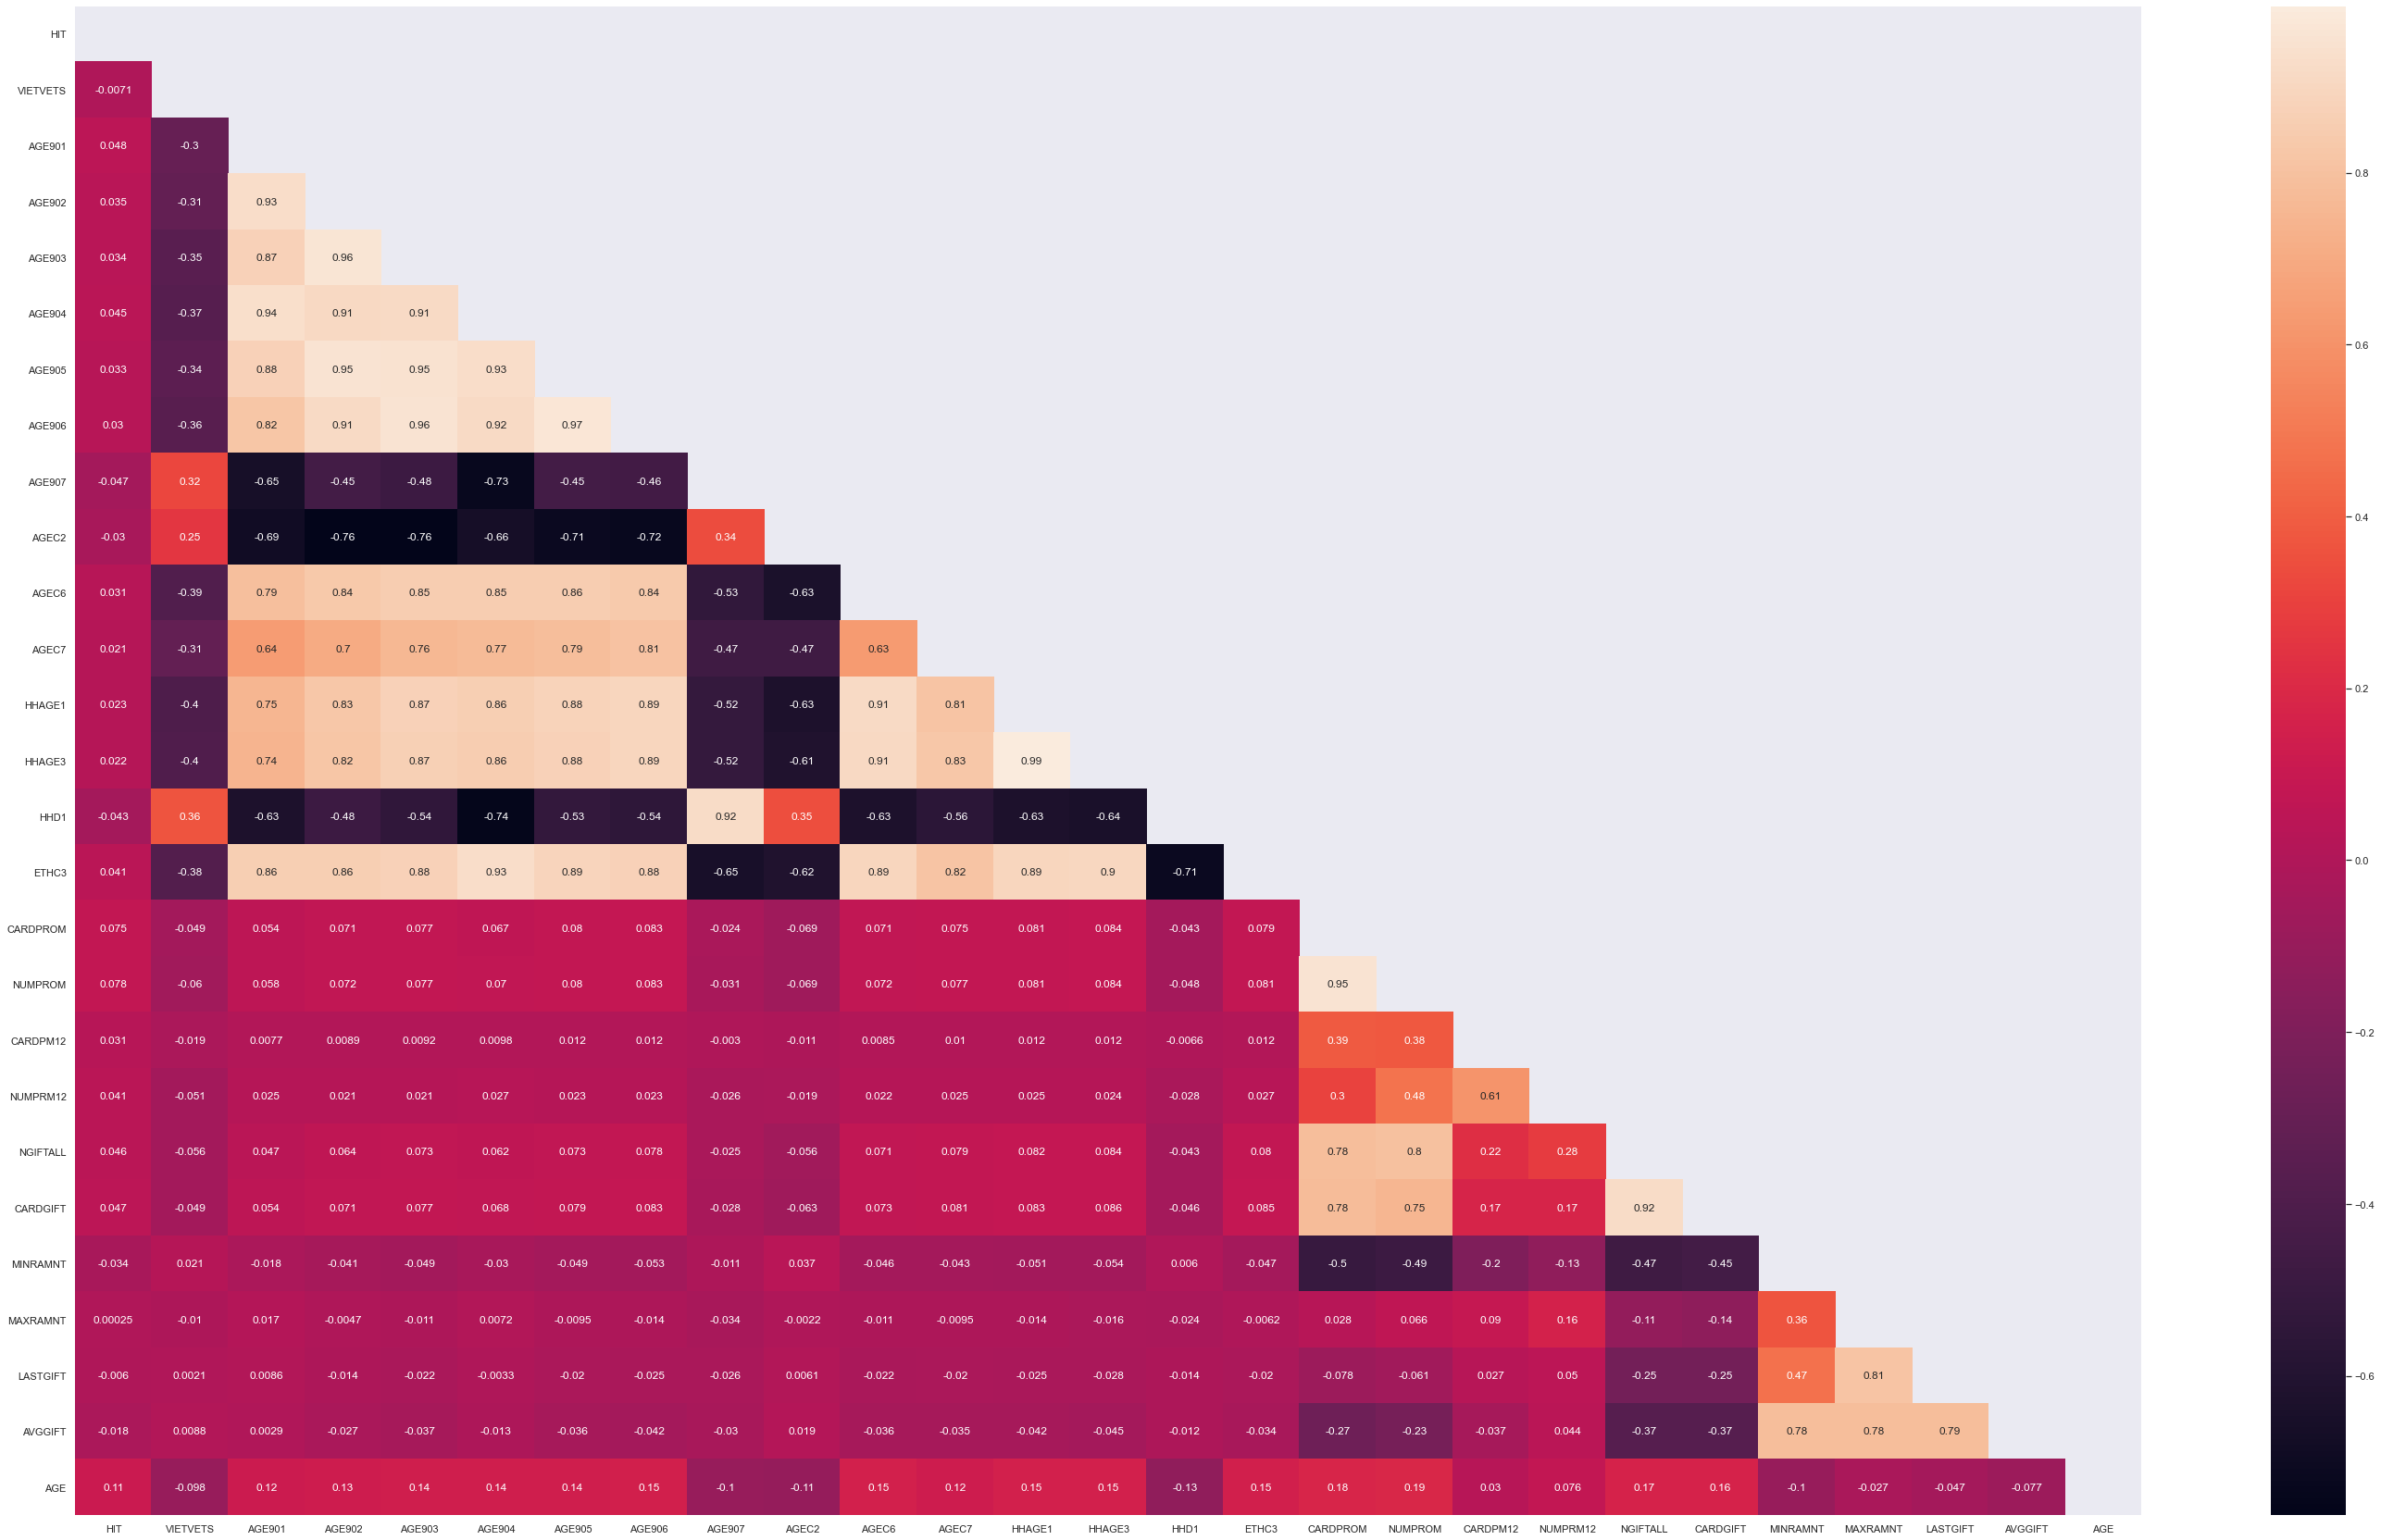

In [39]:
fig, ax = plt.subplots(figsize=(50, 30))

matrix = np.triu(Features_Best_Scores.corr())
sns.heatmap(Features_Best_Scores.corr(), annot=True, mask=matrix)

In [40]:
Features_Best_Scores.drop(columns=["CARDPROM","AGE901","AGE902","AGE903","AGE904","AGE905","AGE906","AGE907","AGEC6","AGEC7","HHAGE3","HHAGE1","CARDGIFT"],inplace=True)

C:\Users\Ricardo Santos\anaconda3\envs\Data_Mining\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

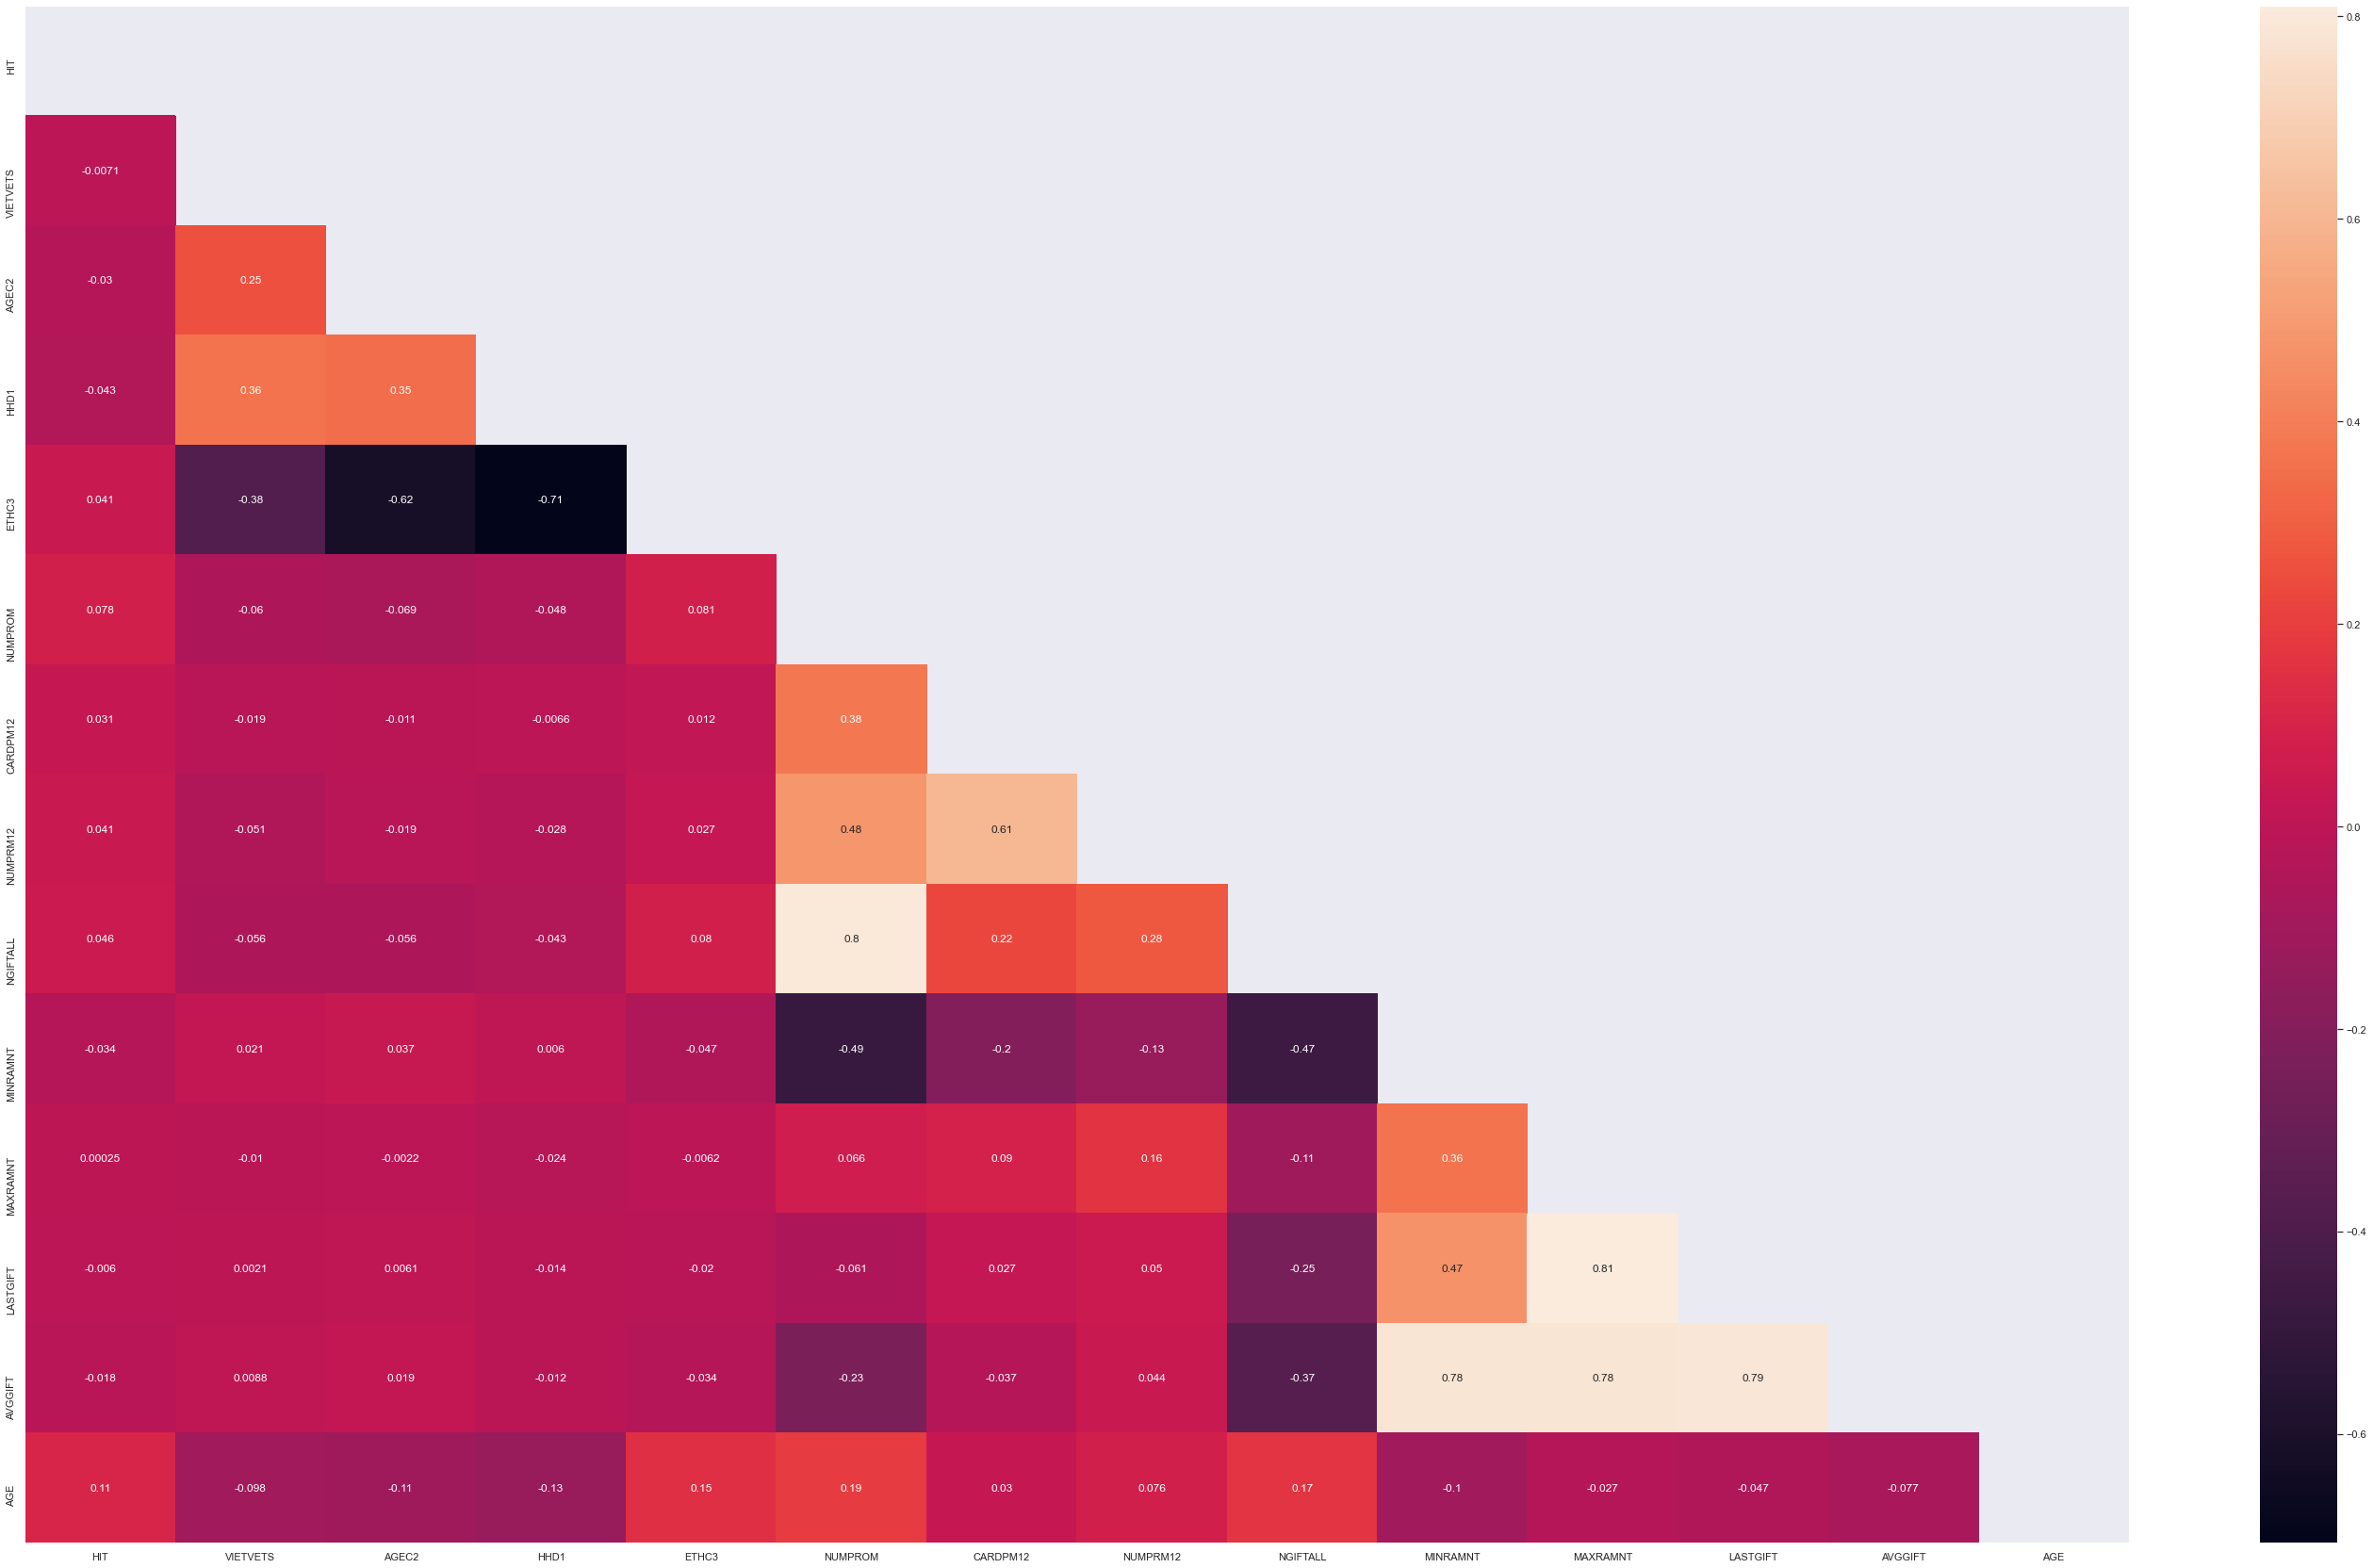

In [43]:
fig, ax = plt.subplots(figsize=(50, 30))

matrix = np.triu(Features_Best_Scores.corr())
sns.heatmap(Features_Best_Scores.corr(), annot=True, mask=matrix)

In [44]:
FeatureSet1=Features_Best_Scores
FeatureSet1

,HIT,VIETVETS,AGEC2,HHD1,ETHC3,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT,AGE
0,0.102123,-0.119261,0.014091,-0.021646,0.032736,0.034378,-0.017342,-0.011432,0.016993,0.014260,2.418327e-02,0.055106,0.052922,0.096845
1,-0.008961,-0.124167,0.047087,0.050092,-0.037759,0.142951,0.188914,0.196440,0.047205,-0.021078,-1.258824e-02,-0.033071,-0.020718,0.053065
2,0.063566,-0.134109,-0.019168,0.027955,0.036812,0.148461,0.259926,0.137161,0.035047,-0.022766,8.158110e-02,-0.001529,0.010005,-0.092761
3,-0.030205,-0.166508,-0.012931,0.028215,0.011298,-0.007271,-0.024212,-0.015961,0.251287,-0.028266,7.098563e-07,-0.014027,-0.038209,0.164326
4,-0.001396,-0.079509,0.019773,-0.045435,-0.014321,0.123206,0.021571,0.081318,0.275897,-0.022699,3.389601e-07,-0.015385,-0.010562,0.000614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.901380,-0.069732,-0.019069,-0.009937,0.019141,-0.053966,-0.039198,-0.022285,-0.035643,0.028513,-7.069525e-03,-0.005875,0.005438,0.000539
95408,-0.021289,-0.117360,-0.001454,-0.053336,0.003113,0.135114,0.080746,0.146287,0.100405,-0.019923,1.189914e-02,0.032856,0.027615,0.078885
95409,-0.025556,0.001412,-0.047722,-0.036558,0.120184,-0.037327,0.038222,-0.013505,-0.021782,-0.023916,-3.713629e-02,-0.063178,-0.053605,0.001088
95410,0.052805,-0.002362,-0.020798,-0.002550,0.006778,0.031007,-0.056154,-0.054274,0.049849,-0.005397,8.102492e-02,0.155305,0.058604,0.088107


- 'HIT' - Indicates total number of known times the donor has responded to a mail order offer other than PVA's.
- 'VIETVETS'- % Vietnam Vets
- 'AGEC2'-Percent Adults Age 25-34
- 'HHD1' - Percent Households w/ Related Children
- 'ETHC3' - Percent White Age 60+
- 'NUMPROM'- Lifetime number of promotions received to date
- 'CARDPM12' - Number of card promotions received in the last 12 months
- 'NUMPROM12',-  Number of promotions received in the last 12 months
- 'NGIFTALL',-  Number of lifetime gifts to date
- 'MINRAMNT',-  Dollar amount of smallest gift to date
- 'MAXRAMNT',-  Dollar amount of largest gift to date
- 'LASTGIFT',-  Dollar amount of most recent gif
- 'AVGGIFT', - Average dollar amount of gifts to date
- 'AGE'
- 'RAMNTALL'

### 2.2 mutual_info_regression X
Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
- > Use the func SelectKBest
    -  score_func  =  mutual_info_regression
- > Train and Test data

- > Choose best scores
    - apply corr



In [47]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

from matplotlib import pyplot
 

def select_features(X_train, y_train, X_test):

# configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k=50)
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
 # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
 
    # split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
Metric_Scores=[]


for i,n in list(zip(range(len(fs.scores_)),X.columns)):
    Metric_Scores.append([n,fs.scores_[i]])

In [48]:
Best_Scores=pd.DataFrame(Metric_Scores, columns=["Feature", "Score"])
Best_Scores.sort_values(by="Score", ascending=False).head(25)

,Feature,Score
301,NGIFTALL,1.158739
262,ANC15,1.084908
169,TPE6,1.071464
240,AFC3,1.069010
168,TPE5,1.053644
286,HC15,1.051928
258,ANC11,1.035445
28,ETH10,1.034492
252,ANC5,1.033430
253,ANC6,1.031609


## 3rd Approach : Lasso with cross validation

In [49]:
from sklearn.linear_model import LassoCV


#Feature Selection

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.000005
Best score using built-in LassoCV: 0.807543
Lasso picked 49 variables and eliminated the other 260 variables


In [50]:
coef=pd.DataFrame(coef)
coef=coef.loc[coef[0]!=0]

Text(0.5, 1.0, 'Feature importance using Lasso Model')

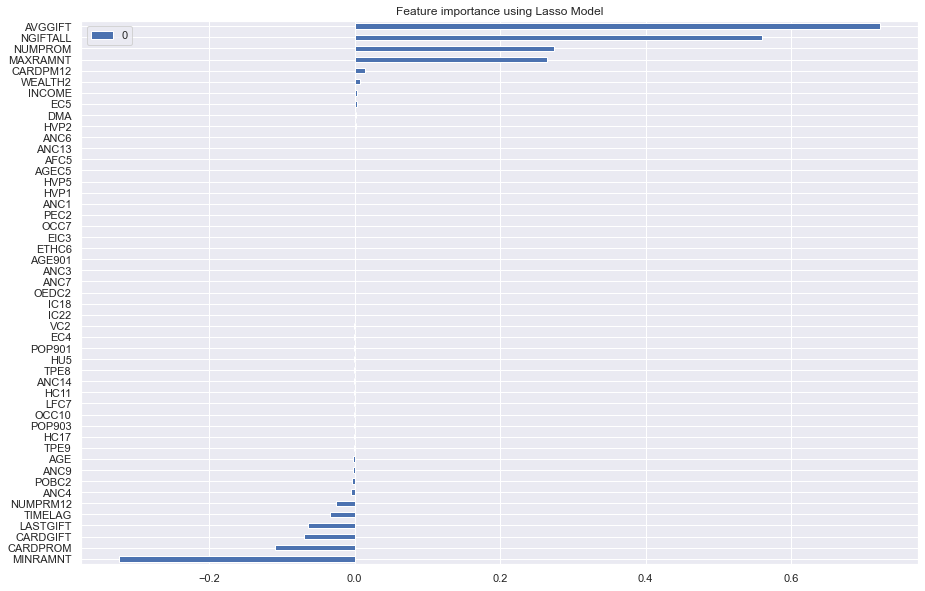

In [51]:
imp_coef = coef.sort_values(by=0)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## 4th Approach: RFE for Regression X

- RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.


In [53]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# define dataset
X = df_metrics.drop(['RAMNTALL'], axis=1) #independents features
y = df_metrics["RAMNTALL"] #target feature 

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=20)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.003 (0.000)


## 5th Approach: PCA

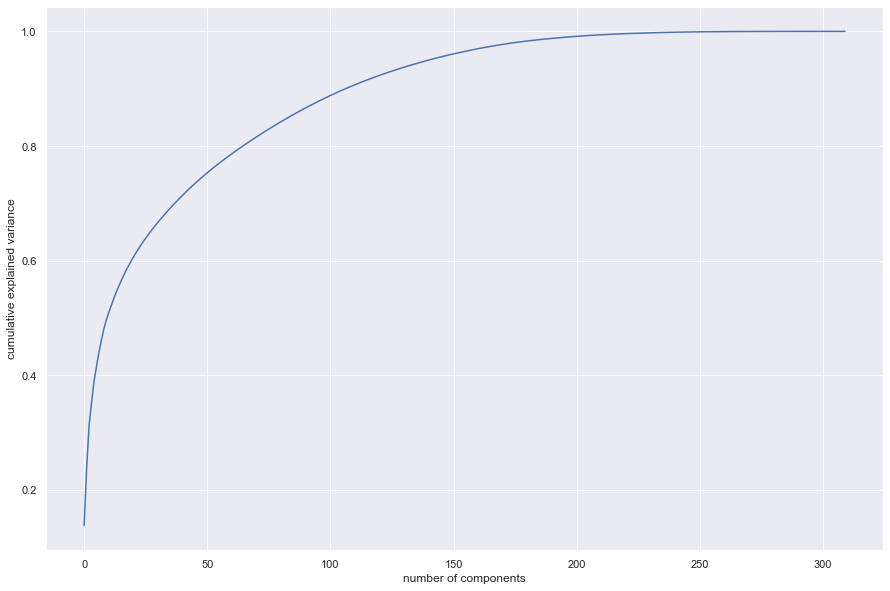

In [54]:
pca = PCA().fit(df_metrics)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [55]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


pca = PCA(n_components=40)
pca_metrics = pca.fit(X)

print (pca_metrics.explained_variance_ratio_)

[0.13792447 0.10092316 0.07379428 0.04036687 0.03729343 0.0260861
 0.02438172 0.02159997 0.018197   0.01591177 0.01303545 0.01233131
 0.01196048 0.01100064 0.01023642 0.00966447 0.00933574 0.00898478
 0.00804954 0.00794162 0.00735824 0.00701781 0.00685521 0.00647679
 0.0063664  0.00602711 0.00593186 0.005694   0.00557511 0.00536131
 0.00517784 0.00503761 0.00496658 0.00473399 0.00470812 0.0045299
 0.00443936 0.00439291 0.0042739  0.00419687]


## LDA

LDA is also famous for its ability to find a small number of meaningful dimensions, allowing us to visualize and tackle high-dimensional problems. 

### LDA vs PCA X

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
%matplotlib inline



X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)

X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Metrics')
    axes[1].title.set_text('PCA for Metrics')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

ValueError: Unknown label type: (array([ 0.08614613,  0.0279488 ,  0.06007977, ..., -0.04075678,
        0.15394677, -0.02995454]),)

#### Draft

In [ ]:

# compare different numbers of features selected using mutual information

from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, y)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))